# NLP-Facebook-Reviews Sentiment Analysis

# Imports

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Functions

In [52]:
def check_class_imbalance(target):
  
  unique, counts = np.unique(target, return_counts=True)
  plt.figure(figsize=(10, 7))
  plt.pie(counts, labels=unique, startangle=140, autopct="%1.1f%%")
  plt.legend()
  plt.show()
  
  plt.figure(figsize=(10, 7))
  sns.countplot(x=target)
  plt.xlabel("Target Class Breakdown")
  plt.ylabel("Counts")
  plt.xticks(rotation=45)
  plt.show()

def check_nulls_dupes(df):
  print(f"The Amount of Nulls: {df.isna().sum()}")
  print(f"The Amount of Dupes: {df.duplicated().sum()}")

def aggregate_df(df, cols, agg, function):
  
  for col in cols:
    plt.figure(figsize=(10, 7))
    grouped_df = df.groupby(agg)[col].sum().reset_index() if function == "sum" else df.groupby(agg)[col].mean().reset_index()
    sns.barplot(data=grouped_df, x=agg, y=col, hue=col)
    plt.title(f"{function} of {col} grouped by {agg}")
    plt.xlabel(agg)
    plt.ylabel(col)
    plt.xticks(rotation=45)
  plt.show()

# EDA Analysis

In [30]:
df = pd.read_csv("/Users/maukanmir/Downloads/facebook_reviews.csv", nrows=50000)
df

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,bdc80475-1569-4ab7-941d-1418df2037a9,Joyce A Shultz,Very good,5,3,462.0.0.47.85,2024-06-05 04:34:12,462.0.0.47.85
1,c730747d-e911-4f2a-9361-a1512d0a618a,Keran Rigby,KarenRigby,5,2,NaN,2024-06-04 14:36:57,NaN
2,0c63a71b-c9b4-4219-a123-38f95028e09b,MD Mahbub,D Good,5,0,NaN,2024-06-03 17:21:39,NaN
3,5c78dff6-df96-4b0d-b7b1-6e3b7d0604b4,Rodolfo Sanotajr,Jayar sanotajr,5,0,NaN,2024-06-03 12:13:41,NaN
4,29096648-1c2d-4252-b943-a51e99e21ec6,Fidaullah Gilgit,Good,5,1,466.1.0.57.85,2024-06-02 17:11:55,466.1.0.57.85
...,...,...,...,...,...,...,...,...
49995,c9f32a76-69e2-4a92-8846-a85ee1db5764,Novice novice,Very god,5,0,462.0.0.47.85,2024-05-10 13:59:37,462.0.0.47.85
49996,dc0a119c-67ee-463c-8303-0820f9e75a5d,Ravi kumar tiwari,"It is okay, not good",1,0,336.0.0.20.117,2024-05-10 13:59:26,336.0.0.20.117
49997,6b4766ff-40f0-4c01-9483-627dae957b62,Mukhir Manloul,تطبيق ممتاز جدا جدا اتمنى ان يحظى بمزيد من الت...,5,0,462.0.0.47.85,2024-05-10 13:59:17,462.0.0.47.85
49998,e33c7fef-6a49-425e-aef9-9d16ec70c986,Akhil Gaming,very nice,5,0,463.0.0.45.85,2024-05-10 13:58:49,463.0.0.45.85


# Check For Class Imbalance

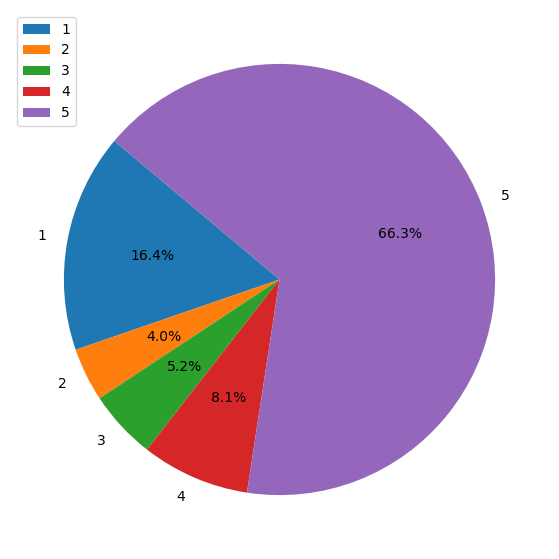

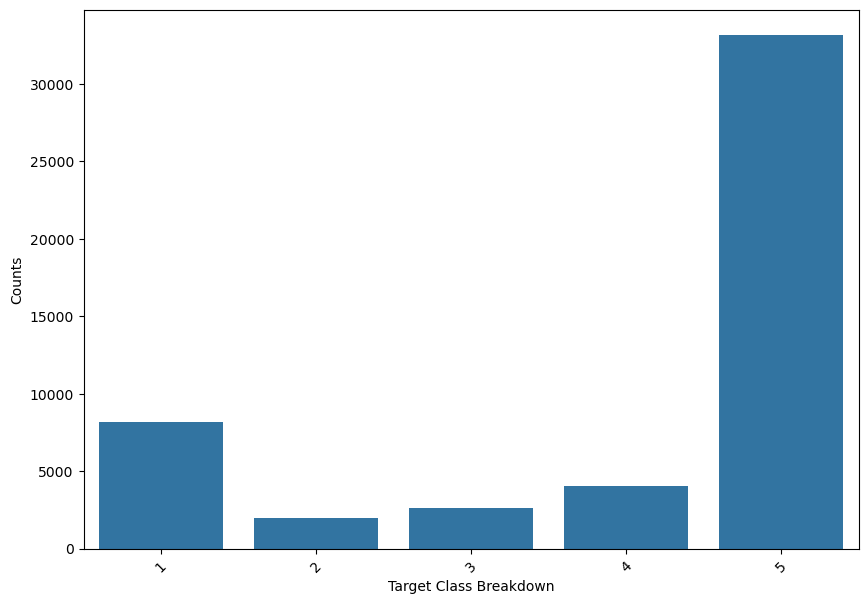

In [31]:
check_class_imbalance(df["score"])

# Class Imbalance Exists

# Check for Nulls and Dupes

In [32]:
check_nulls_dupes(df)

The Amount of Nulls: reviewId                   0
userName                   0
content                    5
score                      0
thumbsUpCount              0
reviewCreatedVersion    8509
at                         0
appVersion              8509
dtype: int64
The Amount of Dupes: 0


In [33]:
df.dropna(inplace=True)

In [34]:
df.shape

(41488, 8)

In [36]:
df.drop(['reviewId', 'userName', 'reviewCreatedVersion', 'appVersion'], axis=1, inplace=True)

In [41]:
df["len_content"] = df["content"].apply(lambda content: len(content))
df["num_words"] = df["content"].apply(lambda content: len(content.split()))

df["at"] = pd.to_datetime(df["at"])
df["year"] = df["at"].dt.year
df["month"] = df["at"].dt.month
df["day"] = df["at"].dt.day
df["hour"] = df["at"].dt.hour
df.drop("at", axis=1, inplace=True)

In [42]:
df

,content,score,thumbsUpCount,len_content,num_words,year,month,day,hour
0,Very good,5,3,9,2,2024,6,5,4
4,Good,5,1,4,1,2024,6,2,17
6,Good Application,5,2,16,2,2024,6,2,8
7,Excellent job,5,2,13,2,2024,6,2,5
8,Great app ever!,5,2,15,3,2024,6,2,2
...,...,...,...,...,...,...,...,...,...
49995,Very god,5,0,8,2,2024,5,10,13
49996,"It is okay, not good",1,0,20,5,2024,5,10,13
49997,تطبيق ممتاز جدا جدا اتمنى ان يحظى بمزيد من الت...,5,0,50,10,2024,5,10,13
49998,very nice,5,0,9,2,2024,5,10,13


<AxesSubplot:xlabel='year', ylabel='Counts'>

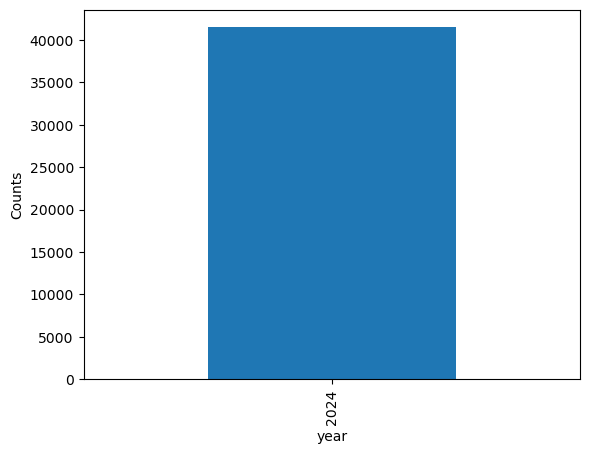

In [44]:
df["year"].value_counts().plot.bar(xlabel="year", ylabel="Counts")

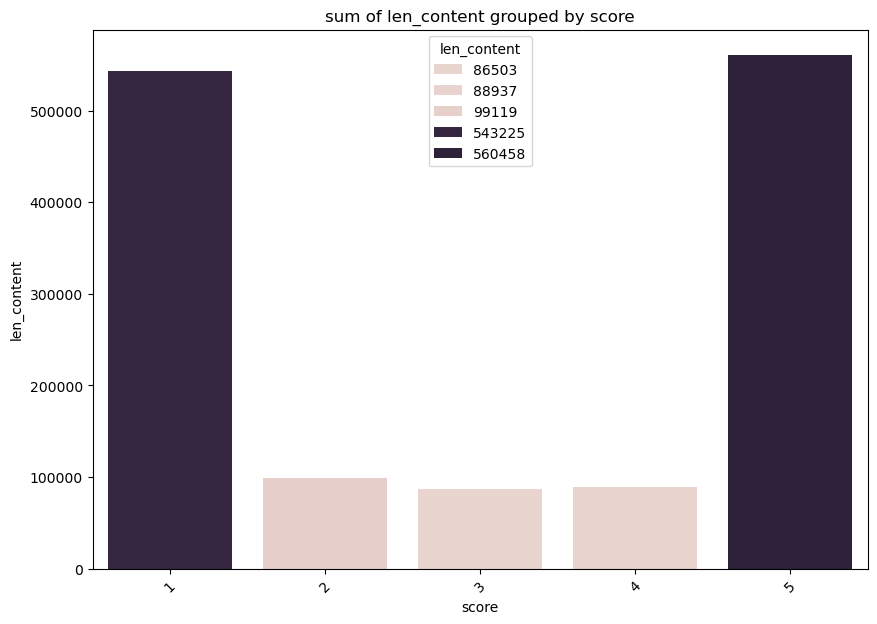

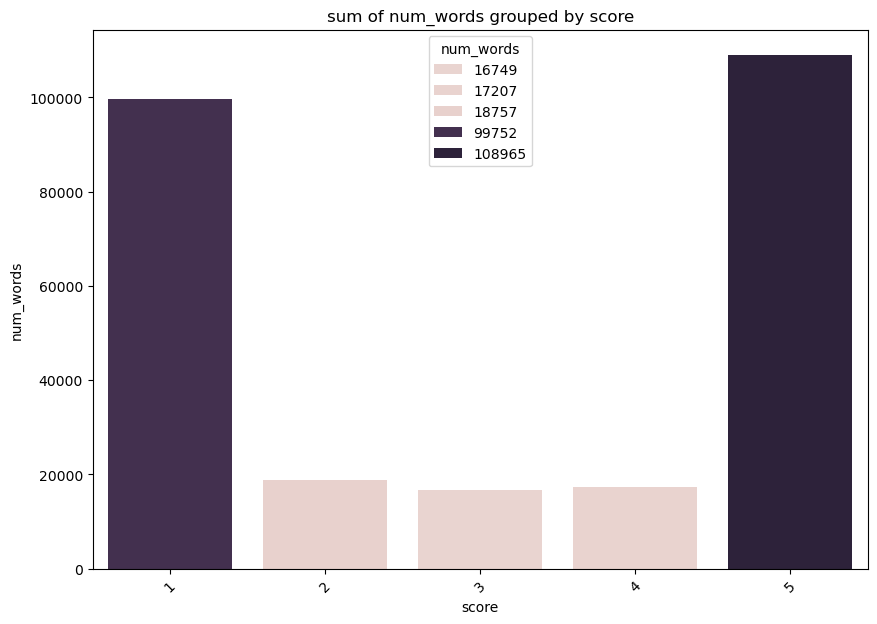

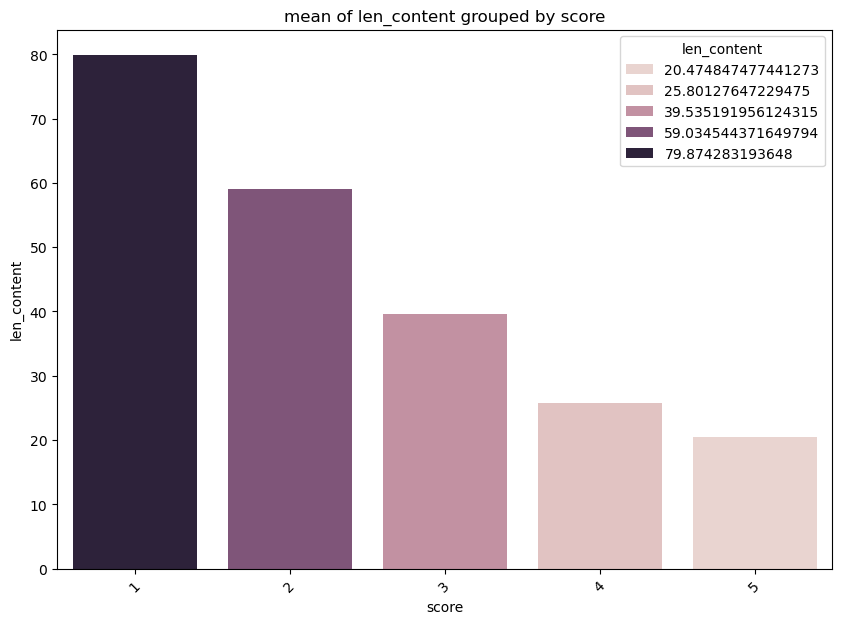

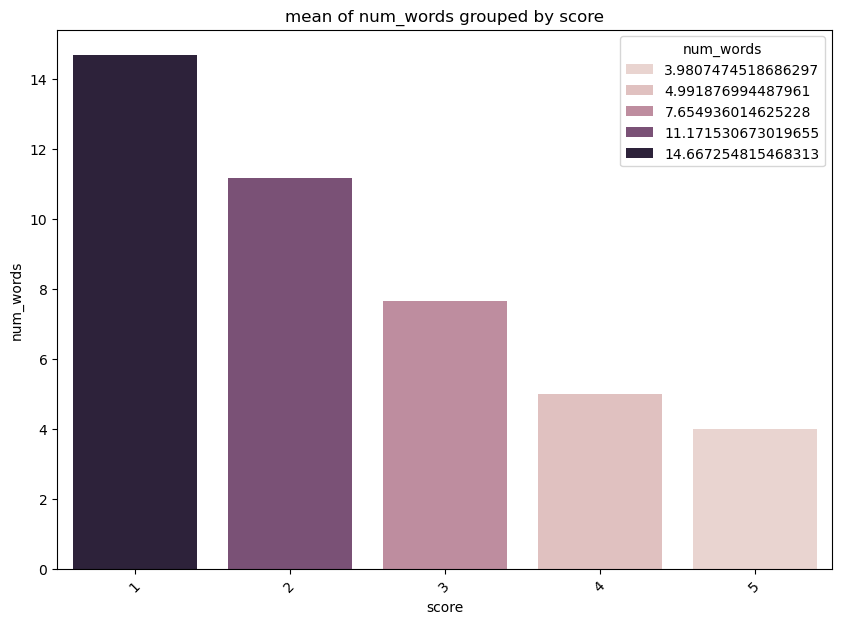

In [53]:
cols = ["len_content", "num_words"]
aggregate_df(df, cols, "score", "sum")
aggregate_df(df, cols, "score", "mean")